# Pre procesamiento de los datos
Versión previa: Oct 21, 2020 

Modificado en Mayo 1, 2021

[1. Adquisición datos](#1.-Adquisición-datos)

[2. Preprocesamiento](#Preprocesamiento)

* [Columnas de valor único](#1.-Columnas-de-valor-único)
* [Convirtiendo strings en floats](#2.-Convirtiendo-strings-en-floats)
* [Datos faltantes](#3.-Datos-faltantes)
* [Agrupando: 'Property_type' y 'Bed_type](#4.-Agrupando-'Property_type'-y-'Bed_type)
* [Availability](#Availability)
* [Eliminando columnas](#5.-Columnas-a-eliminar-dada-la-naturaleza-de-sus-datos)
* [Replacing f, t](#6.-Replacing-f,-t)
* [Bathrooms](#7.-Bathrooms)
* [Amenities](#Amenities)
* [Reemplazando False and True por 0,1](#6.-Reemplazando-False-and-True-por-0,1)
* [Generando dummies](#8.-Generando-dummies-de-variables-categóricas)
* [Removiendo datos faltantes](#9.-Removiendo-datos-faltantes)

[3. Dataset final](#3.-Dataset-final)

### 1. Adquisición datos

Los datos han sido extraídos del repositorio oficial de [Airbnb](http://insideairbnb.com/get-the-data.html). Este script ulitiza la actualización de Abril 7 del 2021 para la ciudad de New York

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
pd.options.display.max_columns = None
pd.options.display.max_rows= None

In [2]:
listings=pd.read_csv('listings.csv')

print(f'El dataset de entrada contiene {listings.shape[0]} filas y {listings.shape[1]} columnas')

El dataset de entrada contiene 36905 filas y 74 columnas


In [3]:
listings.tail(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
36903,49091581,https://www.airbnb.com/rooms/49091581,20210407173759,2021-04-09,Furnished Bright Apartment in Hell's Kitchen,1 bedroom apartment in Hell's Kitchen.<br />Mo...,NaN,https://a0.muscache.com/pictures/8f730543-a68b...,305240193,https://www.airbnb.com/users/show/305240193,June,2019-10-29,"New York, New York, United States","At June Homes, our mission is to make renting ...",within a few hours,99%,46%,f,https://a0.muscache.com/im/pictures/user/4adc1...,https://a0.muscache.com/im/pictures/user/4adc1...,Crown Heights,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,t,NaN,Hell's Kitchen,Manhattan,40.76456,-73.98573,Entire apartment,Entire home/apt,1,NaN,1 bath,1.0,1.0,"[""Refrigerator"", ""Essentials"", ""Long term stay...",$123.00,30,180,30.0,30.0,180.0,180.0,30.0,180.0,NaN,t,0,7,37,312,2021-04-09,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,241,42,199,0,NaN
36904,49092532,https://www.airbnb.com/rooms/49092532,20210407173759,2021-04-09,Panoramic city views! 2/3 bdrms private terra...,You’ll be right in the heart of everything at ...,Best neighborhood in NYC !! You have easy walk...,https://a0.muscache.com/pictures/a060b725-ee2d...,154949847,https://www.airbnb.com/users/show/154949847,Emily,2017-10-17,"West New York, New Jersey, United States",We are Emily and Robin and we started travelin...,within a few hours,97%,16%,f,https://a0.muscache.com/im/pictures/user/8a057...,https://a0.muscache.com/im/pictures/user/8a057...,Williamsburg,18.0,18.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Hell's Kitchen,Manhattan,40.77034,-73.99305,Entire apartment,Entire home/apt,6,NaN,2 baths,2.0,3.0,"[""Essentials"", ""Dryer"", ""Long term stays allow...",$299.00,30,85,30.0,30.0,85.0,85.0,30.0,85.0,NaN,t,0,25,55,175,2021-04-09,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,10,10,0,0,NaN


En las columnas se incluye información relacionada con:
* Descripción
* Arrendatario
* Geolocalización
* Caracteristicas del espacio
* Precio
* Valores adicionales
* Calificación
* Licencias

In [4]:
listings.columns.to_list()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

### Preprocesamiento

#### 1. Columnas de valor único

In [5]:
for col in listings.columns: ##Eliminando las columnas que tienen un solo valor 
    if len(listings[col].unique()) == 1:
        listings.drop(col,inplace=True,axis=1)
        
print(f'Luego de remover las columnas con un valor único, permanecen {len(listings.columns)} columnas')

Luego de remover las columnas con un valor único, permanecen 70 columnas


#### 2. Convirtiendo strings en floats

In [6]:
def removing_percentage (dataset, column): #Eliminando % del string y convirtiendolo en número
    dataset[column]=dataset[column].str.replace('%', '').astype('float')
    print(f'La columna  {column} ha sido modificada de string a float')

removing_perc=['host_acceptance_rate', 'host_response_rate']

for var in removing_perc:
    removing_percentage(listings, var)

La columna  host_acceptance_rate ha sido modificada de string a float
La columna  host_response_rate ha sido modificada de string a float


In [7]:
listings['price']=listings['price'].str.replace('$', '')
listings['price']=listings['price'].str.replace(',', '').astype('float')

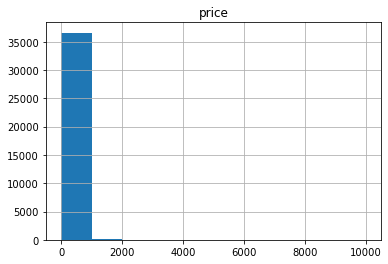

In [8]:
listings.hist(column='price', bins=10)
plt.show()

In [9]:
listings.price.describe()

count    36905.000000
mean       148.559274
std        290.379973
min          0.000000
25%         61.000000
50%        100.000000
75%        160.000000
max      10000.000000
Name: price, dtype: float64

#### 3. Datos faltantes

In [10]:
is_na=listings.isna().sum().sort_values(ascending=False)
np.round(100*is_na/len(np.unique(listings['id'])),2)

host_response_time                              49.43
host_response_rate                              49.43
host_acceptance_rate                            45.31
host_about                                      42.44
neighborhood_overview                           37.44
neighbourhood                                   37.44
review_scores_value                             28.30
review_scores_location                          28.30
review_scores_checkin                           28.30
review_scores_accuracy                          28.27
review_scores_communication                     28.26
review_scores_cleanliness                       28.24
review_scores_rating                            28.20
first_review                                    26.34
reviews_per_month                               26.34
last_review                                     26.34
host_neighbourhood                              20.66
bedrooms                                         9.96
host_location               

In [11]:
listings.bedrooms=listings.bedrooms.fillna(np.mean(listings.bedrooms.dropna())) #Completando datos faltantes con media
listings.beds=listings.beds.fillna(np.mean(listings.beds.dropna())) 

Se identifican y almacenan las columnas con un porcentaje superior a 25% de datos faltantes, para ser eliminadas posteriormente.

In [12]:
most_missing_cols = listings.columns[listings.isnull().sum()/len(listings) > 0.25]
most_missing_cols =most_missing_cols.to_list() #Columnas con un porcentaje de datos faltantes superior al 25%

In [13]:
most_missing_cols

['neighborhood_overview',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [14]:
listings.shape

(36905, 70)

#### 4. Agrupando 'Property_type' y 'Bed_type

In [15]:
listings.pivot_table(index='property_type', values='id', aggfunc='count').sort_values(by='id', ascending=False)

,id
property_type,
Entire apartment,15329
Private room in apartment,12045
Private room in house,1892
Private room in townhouse,1081
Entire house,974
Entire condominium,969
Entire loft,617
Entire townhouse,598
Shared room in apartment,516


In [16]:
listings.loc[listings.property_type.str.contains('oom'), 'property_type']='Room'
listings.loc[listings.property_type.str.contains('ap'), 'property_type']='Apartment'
listings.loc[listings.property_type.str.contains('house'), 'property_type']='House'
listings.loc[listings.property_type.str.contains('Casa'), 'property_type']='House'
listings.loc[~listings['property_type'].isin(['Room', 'Apartment', 'House']),'property_type']='Other'

In [17]:
pivot0=listings.pivot_table(index='property_type', values='id', aggfunc='count').sort_values(by='id', ascending=True)
pivot0['percentage']= np.round(100* (pivot0['id']/pivot0['id'].sum()),1)
pivot0=pivot0.reset_index()

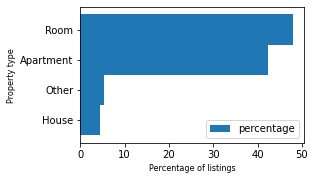

In [18]:
feq = pivot0[['property_type', 'percentage']].sort_values('percentage')
feq=feq.set_index('property_type')
feq.plot.barh(figsize=(4,2.5),  width= 1)
plt.xlabel('Percentage of listings', fontsize = 8)
plt.ylabel('Property type', fontsize = 8)
plt.show()

In [19]:
r=listings.pivot_table(index='room_type', values='id', aggfunc='count', margins=True).sort_values(by='id', ascending=True)
r.columns=['Total']
r

,Total
room_type,
Hotel room,282
Shared room,671
Private room,16709
Entire home/apt,19243
All,36905


In [20]:
listings['room_type']=listings['room_type'].replace('Hotel room', 'Private room') 

#### Availability

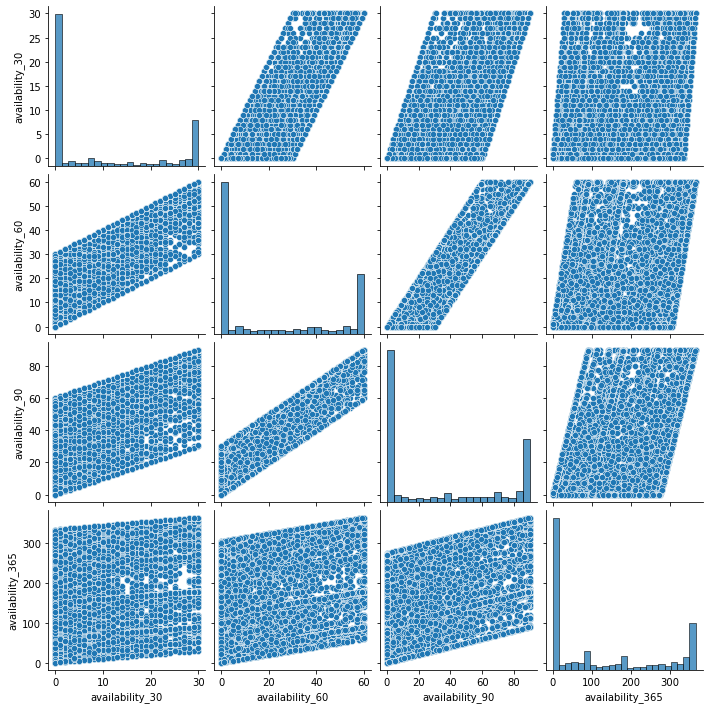

In [21]:
availability=listings[['availability_30','availability_60','availability_90','availability_365']]
sns.pairplot(availability)
plt.show()

#### 5. Columnas a eliminar dada la naturaleza de sus datos

In [22]:
url_field=list(listings.filter(like='url').columns) 
other_pricing_field=list(listings.filter(like='_price').columns)
text_field=['name','neighborhood_overview', 'host_about','description']
other_geo=[  'neighbourhood',  'neighbourhood_cleansed',  'neighbourhood_group_cleansed']
host=['host_id', 'host_name', 'host_since','host_location','host_about','host_neighbourhood',
      'calculated_host_listings_count_private_rooms' ,'host_total_listings_count',
      'calculated_host_listings_count_entire_homes','host_verifications', 'calculated_host_listings_count_shared_rooms']
dates=['last_scraped', 'host_since', 'calendar_last_scraped']
nights=['minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm']
reviews=['number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review']
availability=['availability_30','availability_60','availability_90']

In [23]:
listings=listings.drop(most_missing_cols +url_field+other_pricing_field+text_field+other_geo+host+dates+nights+reviews+availability, axis=1)

In [24]:
listings.head(3)

,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count
0,2595,f,6.0,t,t,40.75356,-73.98559,Apartment,Entire home/apt,2,1 bath,1.318137,1.0,"[""Refrigerator"", ""Essentials"", ""Cleaning befor...",150.0,30,1125,t,365,48,f,3
1,3831,f,1.0,t,t,40.68494,-73.95765,Other,Entire home/apt,3,1 bath,1.000000,3.0,"[""Bathtub"", ""Smoke alarm"", ""Dishes and silverw...",76.0,1,730,t,198,396,f,1
2,5121,f,1.0,t,t,40.68535,-73.95512,Room,Private room,2,NaN,1.000000,1.0,"[""Kitchen"", ""Heating"", ""Wifi"", ""Long term stay...",60.0,30,730,t,365,50,f,1


#### 6. Replacing f, t

In [25]:
listings.replace({'f': 0, 't': 1}, inplace=True)

#### 7. Bathrooms

In [26]:
listings['bathrooms_text'].value_counts()

1 bath               19005
1 shared bath         9377
2 baths               2153
1 private bath        2134
2 shared baths        1097
1.5 baths             1054
1.5 shared baths       737
2.5 baths              292
3 baths                224
0 shared baths         173
3 shared baths         111
2.5 shared baths        89
3.5 baths               66
4 baths                 54
4 shared baths          44
0 baths                 38
Half-bath               34
Shared half-bath        20
4.5 baths               19
Private half-bath       16
5 baths                 10
6 baths                  7
6 shared baths           7
5.5 baths                5
8 baths                  4
4.5 shared baths         3
6.5 shared baths         3
7.5 baths                3
3.5 shared baths         3
5 shared baths           2
7 baths                  2
5.5 shared baths         1
7 shared baths           1
15.5 baths               1
6.5 baths                1
9.5 baths                1
Name: bathrooms_text, dtype:

In [27]:
listings['bathroom_type']=0
listings.bathrooms_text=listings.bathrooms_text.fillna('No data')
listings.loc[listings.bathrooms_text.str.contains('shared'), 'bathroom_type']='Shared'
listings.loc[~listings.bathrooms_text.str.contains('shared'), 'bathroom_type']='Private' #No compartido igual a privado
listings.pivot_table(index='bathroom_type', values='id', aggfunc='count', margins=True)

,id
bathroom_type,
Private,25257
Shared,11648
All,36905


In [28]:
listings['bathrooms_text'].head(5)

0       1 bath
1       1 bath
2      No data
3    1.5 baths
4       1 bath
Name: bathrooms_text, dtype: object

In [29]:
listings['t_bathrooms']=listings['bathrooms_text'].str.extract('(^\d*[.,]?\d)', expand=True).astype('float')
listings['t_bathrooms']=listings['t_bathrooms'].fillna(0.5)

In [30]:
import matplotlib.pyplot as plt
p=listings.pivot_table(index='t_bathrooms', values='id', aggfunc='count').reset_index()
p['t_bathrooms']=p['t_bathrooms'].astype(float)
p=p.sort_values(by='t_bathrooms')
p

,t_bathrooms,id
0,0.0,211
1,0.5,184
2,1.0,30516
3,1.5,1791
4,2.0,3250
5,2.5,381
6,3.0,335
7,3.5,69
8,4.0,98
9,4.5,22


In [31]:
listings['t_bathrooms'].describe()

count    36905.000000
mean         1.159409
std          0.474093
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.500000
Name: t_bathrooms, dtype: float64

### Amenities

In [32]:
listings.amenities.tail()

36900    ["Kitchen", "Security cameras on property", "T...
36901    ["Refrigerator", "Essentials", "Long term stay...
36902    ["Kitchen", "Refrigerator", "TV", "Hot water",...
36903    ["Refrigerator", "Essentials", "Long term stay...
36904    ["Essentials", "Dryer", "Long term stays allow...
Name: amenities, dtype: object

In [33]:
anemities_t=set(listings.amenities)
i=0
nuevas=[]
for item in anemities_t:
    nuevas.append(item.split(','))

In [34]:
nuevas[0][:4]

['["Cable TV"', ' "Refrigerator"', ' "Shower gel"', ' "Essentials"']

In [35]:
len(nuevas)

31447

In [36]:
f_amenities=[]
for sub_lista in nuevas:
    for amenity in sub_lista:
        if amenity in f_amenities:
            continue
        else: f_amenities.append(amenity)

In [37]:
f_amenities[0:4]

['["Cable TV"', ' "Refrigerator"', ' "Shower gel"', ' "Essentials"']

In [38]:
len(f_amenities)

1216

In [39]:
for element in range(len(f_amenities)):
    f_amenities[element]=f_amenities[element].replace('["','')
    f_amenities[element]=f_amenities[element].replace('"]','')
    f_amenities[element]=f_amenities[element].replace('"','')
    f_amenities[element]=f_amenities[element].lstrip(' ') #remueve el espacio de la izquierda
    f_amenities[element]=f_amenities[element].lower()

In [40]:
f_amenities[0:4]

['cable tv', 'refrigerator', 'shower gel', 'essentials']

In [41]:
amenity_list=list(dict.fromkeys(f_amenities))
print(len(amenity_list))

928


In [42]:
amenity_list[0:10]

['cable tv',
 'refrigerator',
 'shower gel',
 'essentials',
 'patio or balcony',
 'long term stays allowed',
 'freezer',
 'luggage dropoff allowed',
 'laundromat nearby',
 'first aid kit']

In [43]:
listings.dtypes

id                                  int64
host_is_superhost                 float64
host_listings_count               float64
host_has_profile_pic              float64
host_identity_verified            float64
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms_text                     object
bedrooms                          float64
beds                              float64
amenities                          object
price                             float64
minimum_nights                      int64
maximum_nights                      int64
has_availability                    int64
availability_365                    int64
number_of_reviews                   int64
instant_bookable                    int64
calculated_host_listings_count      int64
bathroom_type                      object
t_bathrooms                       

##### Listings amenities in lower case

In [44]:
time_start = time.time()
listings=listings.apply(lambda x: x.astype(str).str.lower())
time_end = time.time()
print(f"\nTiempo de ejecución: {round((time_end - time_start)/60,1)} minutos")


Tiempo de ejecución: 0.0 minutos


In [45]:
listings.amenities.head()

0    ["refrigerator", "essentials", "cleaning befor...
1    ["bathtub", "smoke alarm", "dishes and silverw...
2    ["kitchen", "heating", "wifi", "long term stay...
3    ["kitchen", "cable tv", "tv", "carbon monoxide...
4    ["heating", "bed linens", "tv", "iron", "free ...
Name: amenities, dtype: object

In [46]:
## Ensayando con el diccionary en una muestra
listing=listings.head()
lista=amenity_list[0:10]
amenities_dic={}

amenities_dic={}
for elemento in lista:
    for row in range(len(listing)):
        if listing.amenities.str.contains(elemento)[row]==True:
            if elemento in amenities_dic.keys():
                value=amenities_dic.get(elemento)
                amenities_dic[elemento]=value+1
            else: 
                amenities_dic[elemento]=1
        else:
            continue
amenities_dic

{'cable tv': 2,
 'refrigerator': 3,
 'essentials': 3,
 'long term stays allowed': 4,
 'luggage dropoff allowed': 3}

The desired amenities were defined based on an article published by [Airbnb](
https://www.airbnb.com/resources/hosting-homes/a/the-best-amenities-to-offer-right-now-203#:~:text=Guests%20are%20telling%20us%20that,know%20how%20to%20log%20on) in 2020.

In [47]:
desired_amenities=['wifi', 'air conditioning', 'kitchen', 'parking',
                   'patio', 'barbecue', 'outdoor', 'games',
                   'towels', 'gloves', 'sanitizer',
                  'soap', 'shampoo']

In [48]:
for elemento in desired_amenities:
    listings['am_'+elemento]=listings.amenities.str.contains(elemento)

In [49]:
listings.amenities[0]

'["refrigerator", "essentials", "cleaning before checkout", "long term stays allowed", "luggage dropoff allowed", "baking sheet", "dishes and silverware", "kitchen", "keypad", "tv", "heating", "fire extinguisher", "paid parking off premises", "free street parking", "cooking basics", "bathtub", "stove", "ethernet connection", "hot water", "wifi", "hair dryer", "dedicated workspace", "iron", "extra pillows and blankets", "coffee maker", "carbon monoxide alarm", "hangers", "smoke alarm", "oven", "bed linens", "air conditioning"]'

In [50]:
listings[listings.columns[listings.columns.str.contains('am_')]].head(1)

,am_wifi,am_air conditioning,am_kitchen,am_parking,am_patio,am_barbecue,am_outdoor,am_games,am_towels,am_gloves,am_sanitizer,am_soap,am_shampoo
0,True,True,True,True,False,False,False,False,False,False,False,False,False


In [ ]:
listings.shape

In [51]:
for col in listings.columns: ##Eliminando las columnas que tienen un solo valor 
    if len(listings[col].unique()) == 1:
        listings.drop(col,inplace=True,axis=1)
        
print(f'Luego de remover las columnas con un valor único, permanecen {len(listings.columns)} columnas')

Luego de remover las columnas con un valor único, permanecen 34 columnas


#### 6. Reemplazando False and True por 0,1

In [52]:
listings.replace({False: 0, True: 1}, inplace=True)

#### 8. Generando dummies de variables categóricas

In [53]:
listings=pd.concat([listings, pd.get_dummies(listings['property_type'])], axis=1) 
listings=pd.concat([listings, pd.get_dummies(listings['room_type'])], axis=1) 
listings=pd.concat([listings, pd.get_dummies(listings['bathroom_type'])], axis=1) 

In [54]:
listings.head(2)

,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,bathroom_type,t_bathrooms,am_wifi,am_air conditioning,am_kitchen,am_parking,am_patio,am_barbecue,am_outdoor,am_games,am_soap,am_shampoo,apartment,house,other,room,entire home/apt,private room,shared room,private,shared
0,2595,0.0,6.0,1.0,1.0,40.75356,-73.98559,apartment,entire home/apt,2,1 bath,1.3181366796063916,1.0,"[""refrigerator"", ""essentials"", ""cleaning befor...",150.0,30,1125,1,365,48,0,3,private,1.0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,3831,0.0,1.0,1.0,1.0,40.684940000000005,-73.95765,other,entire home/apt,3,1 bath,1.0,3.0,"[""bathtub"", ""smoke alarm"", ""dishes and silverw...",76.0,1,730,1,198,396,0,1,private,1.0,1,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0


In [55]:
var_categorical=['property_type', 'room_type','bathroom_type' ,'bathrooms_text','amenities' ]
listings=listings.drop(var_categorical, axis=1)

#### 9. Removiendo datos faltantes

In [56]:
listings_final=listings.dropna()
percentage=listings_final.shape[0]/listings.shape[0]
print(f'Luego del preprocesamiento, permanece un {percentage:.4f} del conjunto inicial' , ) 

Luego del preprocesamiento, permanece un 1.0000 del conjunto inicial


In [57]:
listings_final.shape

(36905, 38)

In [58]:
listings_final.tail(3)

,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,t_bathrooms,am_wifi,am_air conditioning,am_kitchen,am_parking,am_patio,am_barbecue,am_outdoor,am_games,am_soap,am_shampoo,apartment,house,other,room,entire home/apt,private room,shared room,private,shared
36902,49089765,0.0,0.0,1.0,1.0,40.72511,-73.98222,2,1.0,1.0,145.0,30,1125,1,300,0,0,3,1.0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
36903,49091581,0.0,1.0,1.0,1.0,40.764559999999996,-73.98573,1,1.0,1.0,123.0,30,180,1,312,0,0,241,1.0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
36904,49092532,0.0,18.0,1.0,1.0,40.770340000000004,-73.99305,6,2.0,3.0,299.0,30,85,1,175,0,0,10,2.0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0


In [59]:
listings.dtypes

id                                object
host_is_superhost                 object
host_listings_count               object
host_has_profile_pic              object
host_identity_verified            object
latitude                          object
longitude                         object
accommodates                      object
bedrooms                          object
beds                              object
price                             object
minimum_nights                    object
maximum_nights                    object
has_availability                  object
availability_365                  object
number_of_reviews                 object
instant_bookable                  object
calculated_host_listings_count    object
t_bathrooms                       object
am_wifi                            int64
am_air conditioning                int64
am_kitchen                         int64
am_parking                         int64
am_patio                           int64
am_barbecue     

In [60]:
listings_final.shape

(36905, 38)

### 3. Dataset final

In [61]:
listings_final.to_csv('Listings_clean.csv')